# Auswertung des Versuchs Opitsche Spektroskopie

In [1]:
import numpy as np
from Messung import Messung
from Messung import fehlerfortpflanzung as fehlfort
from pathlib import Path
from makePlot import makePlot
from Rundung import rundung

### Aufgabe 1


In [2]:
b = 33 #mm
db = 0.5 #mm
f = 120 #mm

### Aufgabe 2

Der brechende Winkel $\epsilon$ wird anhand der gemessenen weißen Linien berechnet. Der Nullpunkt liegt auf der optischen Achse der Quecksilberdampflampe. Um den Winkel $2\epsilon$ zu berechnen müssen daher nur die gemessenen $\gamma_1$ und $\gamma_2$ subrahiert werden. $\epsilon$ ist dann die Hälfte von $2\epsilon$.

In [3]:
gam_1 = 115 #°
gam_2 = 239.4 #°
dgam = 0.2 #°

epsi_2 = gam_2 - gam_1
d_epsi_2 = dgam + dgam
epsi = epsi_2/2
d_epsi = fehlfort(epsi, epsi_2, d_epsi_2)
print("2\u03B5 lautet {}\u00B1{}°.\n\u03B5 ist {}\u00B1{}°.".format(epsi_2, d_epsi_2, epsi, d_epsi))

2ε lautet 124.4±0.4°.
ε ist 62.2±0.2°.


### Aufgabe 3

#### Berechnen der realtiven Winkel

In [4]:
d_gem_winkel = 0.005 #°
d_lambda = 0.05 #nm

winkelmessungdata = Path("winkelmessung.txt")

mess_tab = Messung(winkelmessungdata)

rel_winkel = 180 - mess_tab.gem_winkel #°

print("Die im Versuch gemessenen Winkel sind", mess_tab.gem_winkel, "in °.")
print("Die korrigierten relativen Winkel betragen", rel_winkel, "in °.")

Die im Versuch gemessenen Winkel sind [128.15 129.05 130.15 131.05 131.2  132.17] in °.
Die korrigierten relativen Winkel betragen [51.85 50.95 49.85 48.95 48.8  47.83] in °.


#### Zuordnung der Farben zur Wellenlänge im Quecksilberspektrum:

Dafür werden Literaturwerte aus dem Internet genommen, da im Skript die Farben schwarz-weiß dargestellt sind.<br>
https://www.rhetos.de/html/lex/quecksilberspektrum.htm <br>

404,66 nm (sichtbares Licht violett) <br>
435,83 nm (sichtbares Licht blau) <br>
491,60 nm (sichtbares Licht cyan) <br>
546,07 nm (sichtbares Licht grün) <br>
576,96 nm (sichtbares Licht orange) <br>
579,07 nm (sichtbares Licht orange) <br>
614,95 nm (sichtbares Licht rot)

(Das kann später nochmal auf das Skript angepasst werden, aber es dauerte mir zulange alle farben raus zu schreiben)

In [5]:
farb_nanometers = [('violett', 404.7), ('blau', 435.8), ('cyan', 491.6), ('gruen', 546.1), ('gelb', 577.0), ('dunkelgelb', 579.1)]
print(mess_tab.farbe)

['violett' 'dunkelblau' 'dunkelgruen' 'gruen' 'gelb' 'dunkelgelb']


Korrektur der Farben anhand von bekannten Hg Linien. <br>
dunkelblau -> blau, <br>
dunkelgruen -> cyan

In [6]:
pos = np.where(mess_tab.farbe == 'dunkelblau')
mess_tab.farbe[pos] = 'blau'
pos = np.where(mess_tab.farbe == 'dunkelgruen')
mess_tab.farbe[pos] = 'cyan'

Nun wird die passende Wellenlänge aus "farb_nanometers" generiert.

In [7]:
lambdas = []
for i in range(len(mess_tab.farbe)):
    if mess_tab.farbe[i] == farb_nanometers[i][0]:
        lambdas.append(farb_nanometers[i][1])
print(lambdas)

[404.7, 435.8, 491.6, 546.1, 577.0, 579.1]


Schließlich werden noch Listen mit den Fehlern generiert, die uns gegeben wurden.

In [8]:
d_lambdas = []
d_rel_winkel = []
for i in range(len(lambdas)):
    d_lambdas.append(d_lambda)
    d_rel_winkel.append(d_gem_winkel)

print(d_lambdas)
print(d_rel_winkel)

[0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
[0.005, 0.005, 0.005, 0.005, 0.005, 0.005]


Nun kann die Kallibirerkurve geplottet werden.

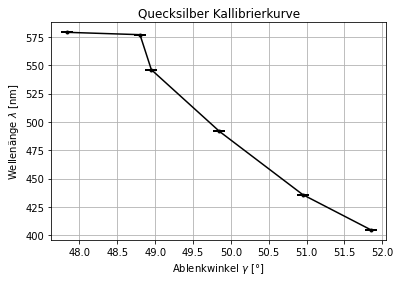

In [9]:
makePlot(rel_winkel,lambdas,xErr=d_rel_winkel,yErr=d_lambdas,titel="Quecksilber Kallibrierkurve",xbeschr="Ablenkwinkel $\gamma$ [°]",ybeschr="Wellenänge $\lambda$ [nm]",lstyl='-')

### Aufgabe 4

Bei den Messwerten handelt es sich um gegebene Vergleichswerte. Diese stammen nicht aus dem eigenen Versuch. Es wird vorgegangen wie in Aufgabe 4.

In [10]:
unb_lampe_data = Path("unb_lampe.txt")

unb_tab = Messung(unb_lampe_data)

unb_rel_winkel = unb_tab.gem_winkel - 180#°

print("Die im Versuch gemessenen Winkel sind", unb_tab.gem_winkel, "in °.")
print("Die korrigierten relativen Winkel betragen", unb_rel_winkel, "in °.")

Die im Versuch gemessenen Winkel sind [231.28 230.35 229.29 228.53 228.18] in °.
Die korrigierten relativen Winkel betragen [51.28 50.35 49.29 48.53 48.18] in °.


Die Vergleichswerte scheinen am besten zu der Heliumlampe zu passen.

In [11]:
farb_nanometers_unb = [('violett',414.4), ('dunkelblau', 438.8), ('blau', 447.1), 
                       ('hellblau', 471.3), ('cyan',492.2), ('tuerkis', 501.6), ('gruen', 504.8), ('gelb', 587.6), 
                       ('hellrot',667.8), ('rot', 706.5), ('dunkelrot', 728.1)]
print(unb_tab.farbe)

['violett' 'violett' 'tuerkis' 'gruen' 'orange']


Vergleicht man die Farben nun mit denen von Helium, sind wieder Anpassungen nötig. <br>

Das intensivere Violett -> dunkelblau <br>
Orange -> Gelb

In [12]:
newlist = []
for k in unb_tab.farbe:
    newlist.append(k)
unb_tab.farbe = newlist
unb_tab.farbe[1] = 'dunkelblau'
unb_tab.farbe[4] = 'gelb'
print(unb_tab.farbe)

unb_lambdas = []
for i in range(len(unb_tab.farbe)):
    for j in range(len(farb_nanometers_unb)):
        if unb_tab.farbe[i] == farb_nanometers_unb[j][0]:
            unb_lambdas.append(farb_nanometers_unb[j][1])
print(unb_lambdas)

['violett', 'dunkelblau', 'tuerkis', 'gruen', 'gelb']
[414.4, 438.8, 501.6, 504.8, 587.6]


In [13]:
d_lambdas_unb = []
d_rel_winkel_unb = []
for i in range(len(unb_lambdas)):
    d_lambdas_unb.append(d_lambda)
    d_rel_winkel_unb.append(d_gem_winkel)

print(d_lambdas_unb)
print(d_rel_winkel_unb)

[0.05, 0.05, 0.05, 0.05, 0.05]
[0.005, 0.005, 0.005, 0.005, 0.005]


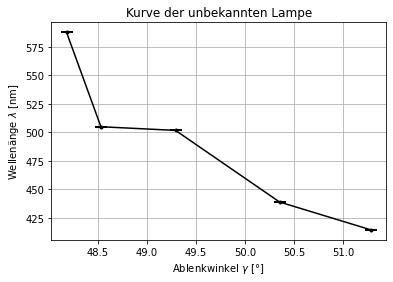

In [14]:
makePlot(unb_rel_winkel,unb_lambdas,xErr=d_rel_winkel_unb,yErr=d_lambdas_unb,titel="Kurve der unbekannten Lampe",xbeschr="Ablenkwinkel $\gamma$ [°]",ybeschr="Wellenänge $\lambda$ [nm]",lstyl='-')

### Aufgabe 5

Für die Darstellung der Dispersionskurve wurden uns wie für Aufgabe 4 Vergleichswerte zur Verfügung gestellt. <br>
Mit Hilfe der Gleichung $ n = n_{0} \frac{\sin(\frac{y+\epsilon}{2})}{\sin(\frac{\epsilon}{2})} $ kann die Kurve graphisch dargestellt werden. <br>

Zunächst müssen die relativen Winkel und Fehler bestimmt werden. Für die Fehler wird wie vorher der Messfehler von 0.005° verwendet.

In [15]:
n_0 = 1.0003 #Brechungsindex Luft

disp_mess = Messung("messung_disp.txt")
rel_winkel_disp = 180 - disp_mess.gem_winkel
print("Die gemessenen Winkel: ", disp_mess.gem_winkel, "\nDie relativen Winkel: ", rel_winkel_disp)

d_rel_winkel_disp = []
for i in range(len(rel_winkel_disp)):
    d_rel_winkel_disp.append(d_gem_winkel)
print("Die Fehler für den Winkel: ", d_rel_winkel_disp)

Die gemessenen Winkel:  [123.2  121.6  117.6  114.61 114.45] 
Die relativen Winkel:  [56.8  58.4  62.4  65.39 65.55]
Die Fehler für den Winkel:  [0.005, 0.005, 0.005, 0.005, 0.005]


Nun werden Mithilfe der Gleichung die Werte für die graphische Darstellung berechnet. <br>

Für die Fehlerfortpflanzung verwenden wir die Formel 
$$ \Delta n =  n \sqrt{(\frac{\Delta(\gamma+\epsilon)}{(\gamma+\epsilon)})^2+(\frac{\Delta\epsilon}{\epsilon})^2} $$



In [16]:
def rad(angle):
    return 2*np.pi*angle/360
def n(gam):
    n = []
    for i in gam:
        zal = np.sin(rad((i + epsi)/2))
        nen = np.sin(rad(epsi/2))
        erg = n_0 * (zal/nen)
        n.append(erg)
    return n

n = n(rel_winkel_disp)
n_sig = []
for i in range(len(n)):
    n_sig.append(rundung(n[i]))
print("Die Werte der Funktion n(y) sind: ", n_sig)

dn = fehlfort(n_sig, (rel_winkel_disp+epsi), (d_rel_winkel_disp+d_epsi), b=epsi, db=d_epsi)
print("Die Fehler sind: ", dn)

Die Werte der Funktion n(y) sind:  [1.67, 1.68, 1.71, 1.74, 1.74]
Die Fehler sind:  [0.00609188 0.00611032 0.00617637 0.00625445 0.00625289]


Für die graphische Auftragung sollen die Wellenlängen $\lambda$ genutzt werden. Dafür werden die Werte aus der Aufgabenbeschreibung des Skripts genutzt. Dabei ist allerdings nicht klar welche gelbe Linie in den Vergleichswerten gemeint ist. Wir nehmen diese als Literaturwerte ohne Fehler an. <br>

Dann kann die Kurve geplottet werden.

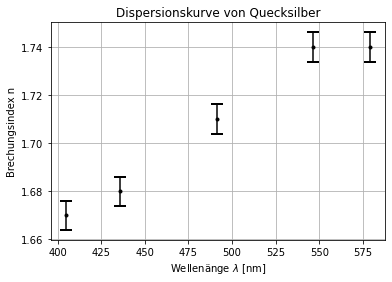

In [17]:
lambdas_disp = [404.7,435.8,491.6,546.1,579.1]
makePlot(lambdas_disp, n_sig, yErr=dn, titel="Dispersionskurve von Quecksilber", xbeschr="Wellenänge $\lambda$ [nm]", ybeschr="Brechungsindex n")

Allerdings ist das Finden der Steigung problematisch, da die gegebenen Messwerte nur für eine der beiden gelben Linien genutzt werden kann. Zudem stört die grüne Linie, da der Funktionswert des entsprechenden Winkel auf signifikante Stellen gerundet gleich dem der gelben Linie ist. Die Steigung der Tangente zwischen den Linien 579nm, 577nm und 546nm wäre 0. <br>

Wenn wir auf die Rundung auf signifikante Stellen verzichten, sind die problematischen Werte wieder ausreichend unterschiedlich.

Die Werte der Funktion n(y) sind:  [1.6686, 1.68216, 1.71462, 1.73752, 1.73872]
Die Fehler sind:  [0.00608677 0.00611817 0.00619306 0.00624554 0.00624829]


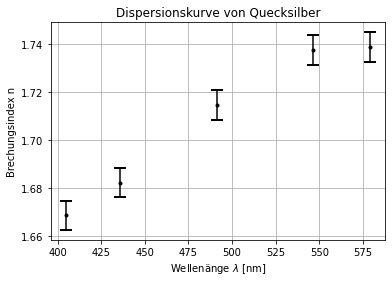

In [18]:
n_neu = []
for i in range(len(n)):
    n_neu.append(round(n[i], 5))
print("Die Werte der Funktion n(y) sind: ", n_neu)

dn = fehlfort(n_neu, (rel_winkel_disp+epsi), (d_rel_winkel_disp+d_epsi), b=epsi, db=d_epsi)
print("Die Fehler sind: ", dn)

lambdas_disp = [404.7,435.8,491.6,546.1,579.1]
makePlot(lambdas_disp, n_neu, yErr=dn, titel="Dispersionskurve von Quecksilber", xbeschr="Wellenänge $\lambda$ [nm]", ybeschr="Brechungsindex n")

Jedoch besteht weiterhin das Problem, dass keine 577nm Linie gemessen wurde. Um eine näherungsweise Steigung zu finden, wird eine Kurve per Hand durch die Punkte gezogen.

### Aufgabe 6

Das Auflösungsvermögen wird über die Formel
$$ \frac{\lambda}{\Delta \lambda} = t\frac{dn}{d\lambda} = 2b(\frac{sin(\frac{\epsilon}{2})}{cos(\frac{\gamma + \epsilon}{2})})\frac{dn}{d\lambda} $$
bestimmt. Wobei $\gamma$ der gelben Linie und $\frac{dn}{d\lambda}$ aus Aufgabe 5 entnommen werden. Der brechende Winkel $\epsilon$ ist in Aufgabe 2 berechnet.

In [19]:
disp = 0.000038 # [1/nm]
d_disp = 0.000045

def aufloesung(b, epsi, gam):
    zal = np.sin(rad(epsi/2))
    nen = np.cos(rad((gam + epsi)/2))
    aufl = 2*b*(zal/nen)
    return aufl
aufl = aufloesung(b, epsi, rel_winkel_disp[4])
d_aufl_1 = fehlfort(aufl, (rel_winkel_disp[4]+epsi), (d_rel_winkel_disp[4]+d_epsi), epsi, d_epsi)
d_aufl = fehlfort((aufl*disp), aufl, d_aufl_1, disp, d_disp)
print("Das Auflösungsvermögen ist {}\u00B1{}".format(rundung(aufl*disp), rundung(d_aufl)))

Das Auflösungsvermögen ist 0.0029±0.0035


Der hohe Fehler lässt sich dadurch erklären, dass für die Grenzgeraden der Fehlerschlauch der Fehler vom Brechungsindex genommen worden. Die Steigung aus der graphischen Auswertung ist höher als der Wert selbst, was sich bis zum Auflöungsvermögen zieht. Dennoch spiegelt dieser Fehler wieder, dass nicht die Steigung zwischen der 577nm und 579nm Linie berechnet wurde, sondern als Annährung die 564nm Linie genommen wurde. Diese hat einen großen Abstand im Vergleich zu den eigentlich angedachten Punkten und verzerrt dadurch das Auflösungsvermögen stark.